# Explore here

IMPORTACIONES

In [14]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

LEER CSV IMPORTAR DATA

In [6]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


NUMERO DE FILAS Y COLUMNAS 

In [7]:
#Monitoreo de datos
total_data.shape

(48895, 16)

INFO POR COLUMNA: INDEX - NAMECOLUMNS - NON NULL - DTYPE

In [8]:
#NON-NULL NUMS: Busqueda de relacion entre datos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

DETECTAR DUPLICADOS

In [11]:
# No se han encontrado duplicados
total_data.drop("id", axis = 1).duplicated().sum()


np.int64(0)

ELIMINAR INFO IRRELEVANTE

In [13]:
total_data.drop(["id","host_id","name", "host_name","latitude","longitude","last_review","reviews_per_month"], axis = 1, inplace = True)
#También se puede codificar actualizando la variable: total_data = total_data.drop([], axis=1)
total_data.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


ANÁLISIS DE VARIBALES UNIVAR.

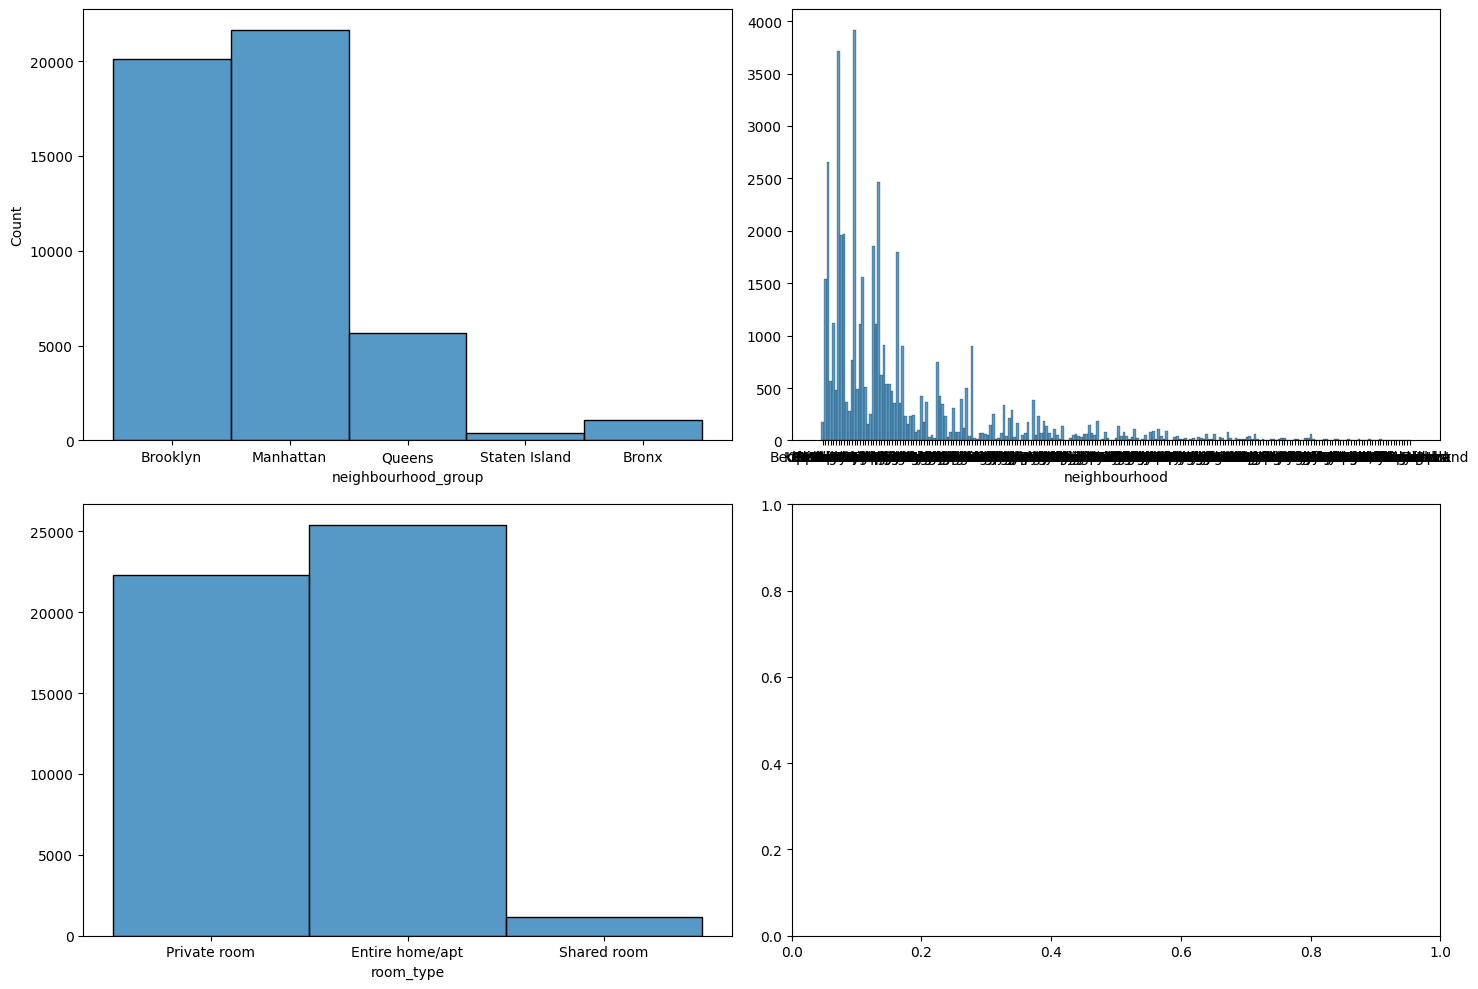

In [23]:
#Variables categoricas: neighbourhood_group, neighbourhood,room_type

fig, axis = plt.subplots(2, 2, figsize = (15, 10))
#2,2= dos rows  y dos columns

sns.histplot(ax = axis[0, 0], data = total_data, x = "neighbourhood_group")
sns.histplot(ax = axis[0, 1], data = total_data, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = total_data, x = "room_type").set(ylabel = None)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


CONCLUSIONES DEL ANÁLISIS
- Primera gráfica: El barrio dónde encontramos más apatamentos es Manhattan seguido de Brooklyn y en el que menos con diferencia es Staten Island
- Segunda gráfica: Los datos son prácticamente imposible de analizar
- Tercera gráfica: La mayoria de propiedades publicadas son casas completas y muy pocas de ellas son habitaciones compartidas

COMPROBAR VALORES UNICOS DENTRO DE UNA COLUMNA

In [22]:
total_data["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

ANÁLISIS VAR NUMERICAS
- Variables numericas: price	minimum_nights	number_of_reviews	calculated_host_listings_count	availability_365

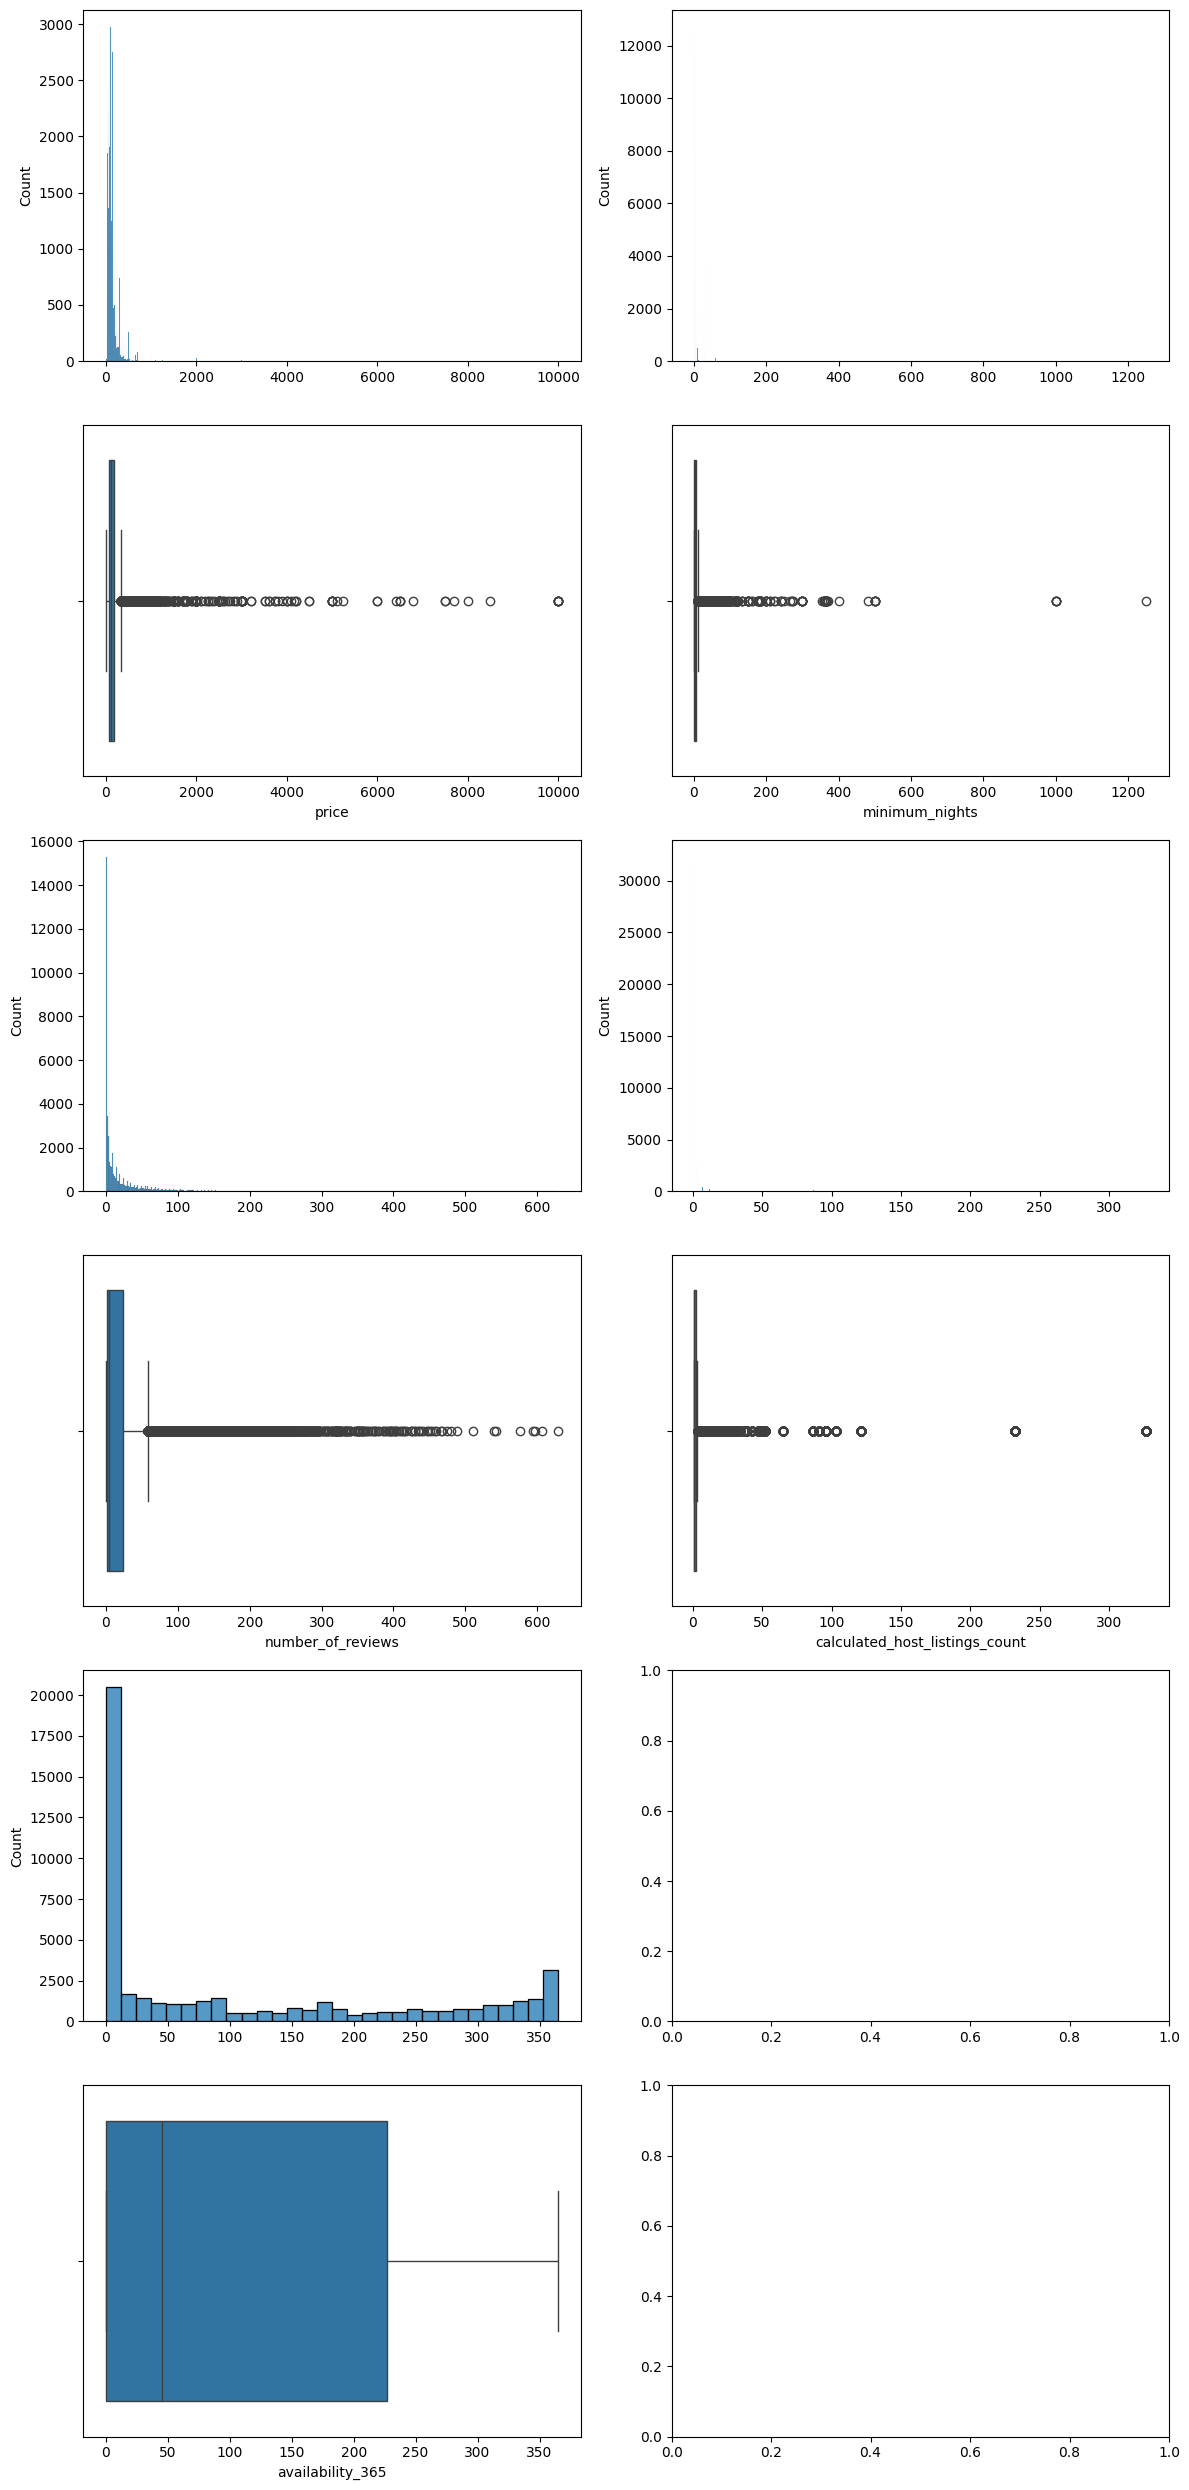

In [26]:
fig, axis = plt.subplots(6, 2, figsize = (12, 25))

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")

sns.histplot(ax = axis[0,1], data = total_data, x = "minimum_nights").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews")

sns.histplot(ax = axis[2, 1], data = total_data, x = "calculated_host_listings_count").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count")

sns.histplot(ax = axis[4, 0], data = total_data, x = "availability_365").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = total_data, x = "availability_365")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()